In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/news_train_data.csv')

In [ ]:
df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [ ]:
class_counts = df['Class Index'].value_counts()
print(class_counts)

Class Index
3    30000
4    30000
2    30000
1    30000
Name: count, dtype: int64


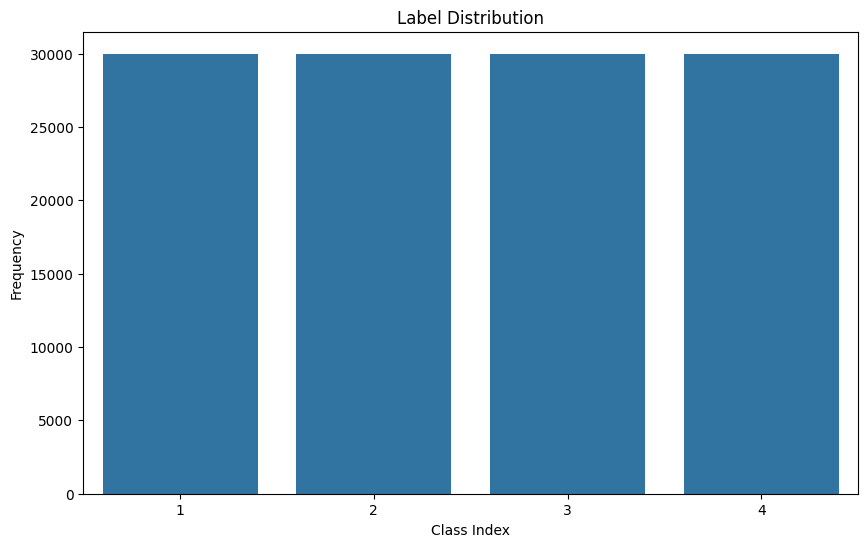

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Class Index')
plt.title('Label Distribution')
plt.xlabel('Class Index')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['Text']= df['Title']+ " " + df['Description']
df.head()

,Class Index,Title,Description,Text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."


In [ ]:
df.drop(['Title', 'Description'], axis=1, inplace=True)


In [ ]:
df.head()

,Class Index,Text
0,3,Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new..."


In [ ]:
df['text_length'] = df['Text'].apply(len)
#Group by 'class_index' and calculate the average length of the merged text
average_lengths = df.groupby('Class Index')['text_length'].mean()

print("Average length of news text by class index:")
print(average_lengths)


Average length of news text by class index:
Class Index
1    242.611533
2    224.610733
3    241.408567
4    237.209267
Name: text_length, dtype: float64


In [ ]:
# Calculate the word count of each merged text
df['word_count'] = df['Text'].apply(lambda x: len(x.split()))

# Group by 'class_index' and calculate the average word count of the merged text
average_word_counts = df.groupby('Class Index')['word_count'].mean()
max_word_counts = df.groupby('Class Index')['word_count'].max()
median_word_counts = df.groupby('Class Index')['word_count'].median()

statistics_df = pd.DataFrame({
    'Average_Word_Count': average_word_counts,
    'Max_Word_Count': max_word_counts,
    'Median_Word_Count': median_word_counts
})
print(statistics_df)

             Average_Word_Count  Max_Word_Count  Median_Word_Count
Class Index                                                       
1                     38.882433             145               39.0
2                     37.767933             151               37.0
3                     37.538233             134               37.0
4                     37.189867             177               36.0


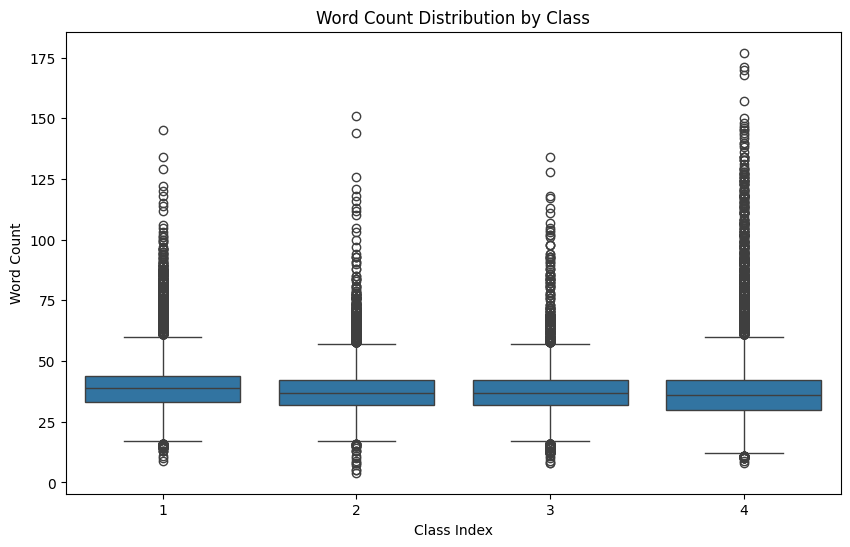

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class Index', y='word_count')
plt.title('Word Count Distribution by Class')
plt.xlabel('Class Index')
plt.ylabel('Word Count')
plt.show()


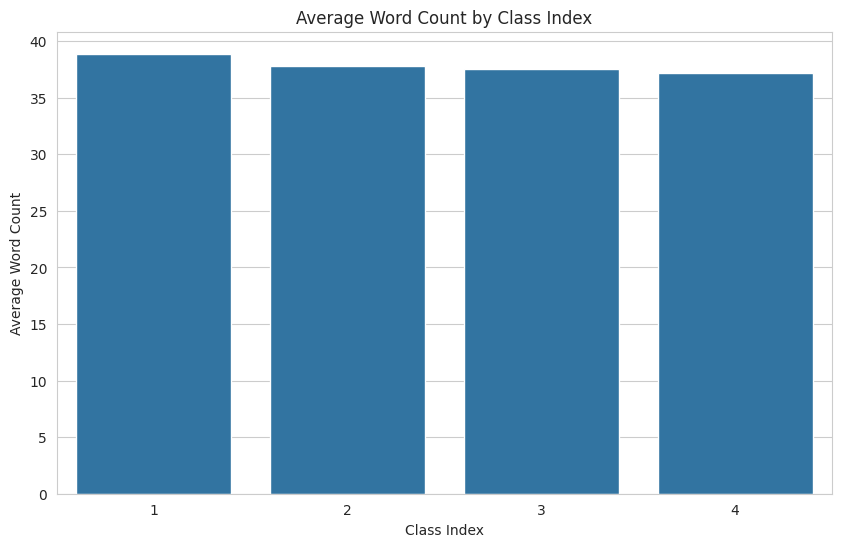

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")
average_word_counts = df.groupby('Class Index')['word_count'].mean().reset_index()
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Class Index', y='word_count', data=average_word_counts)

# Add titles and labels
plt.title('Average Word Count by Class Index')
plt.xlabel('Class Index')
plt.ylabel('Average Word Count')

# Display the plot
plt.show()

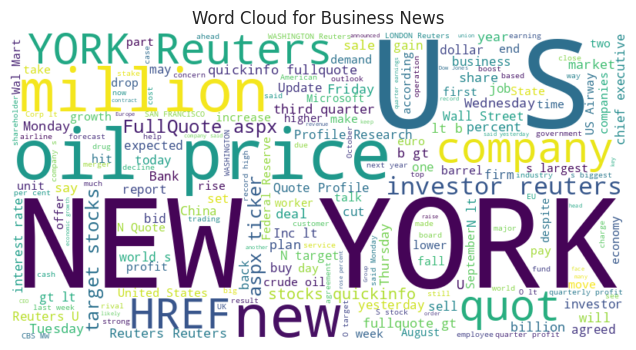

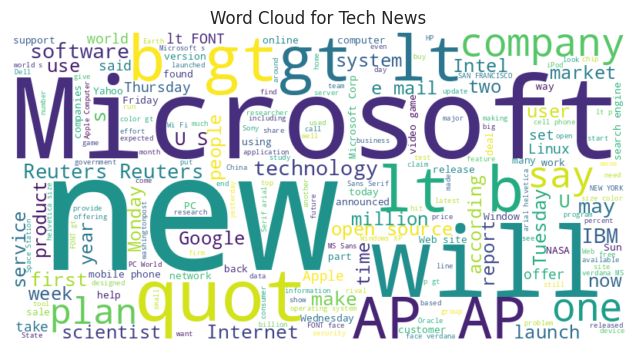

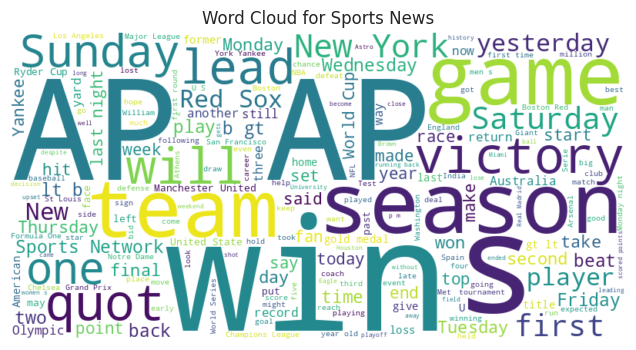

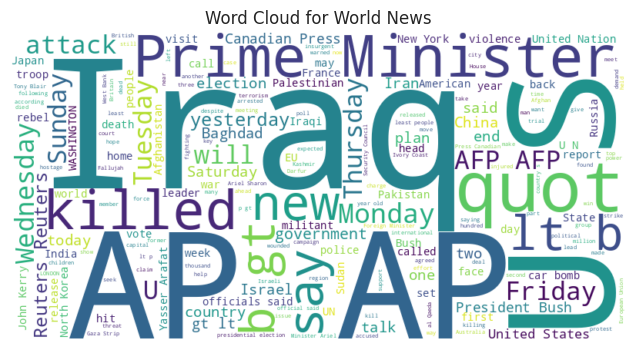

In [ ]:
# Function to generate and plot word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word cloud for each class index
class_indices = df['Class Index'].unique()
# Class labels mapping
class_labels = {
    1: 'World News',
    2: 'Sports News',
    3: 'Business News',
    4: 'Tech News'
}
for class_index in class_indices:
    text = ' '.join(df[df['Class Index'] == class_index]['Text'])
    generate_word_cloud(text, f'Word Cloud for {class_labels[class_index]}')


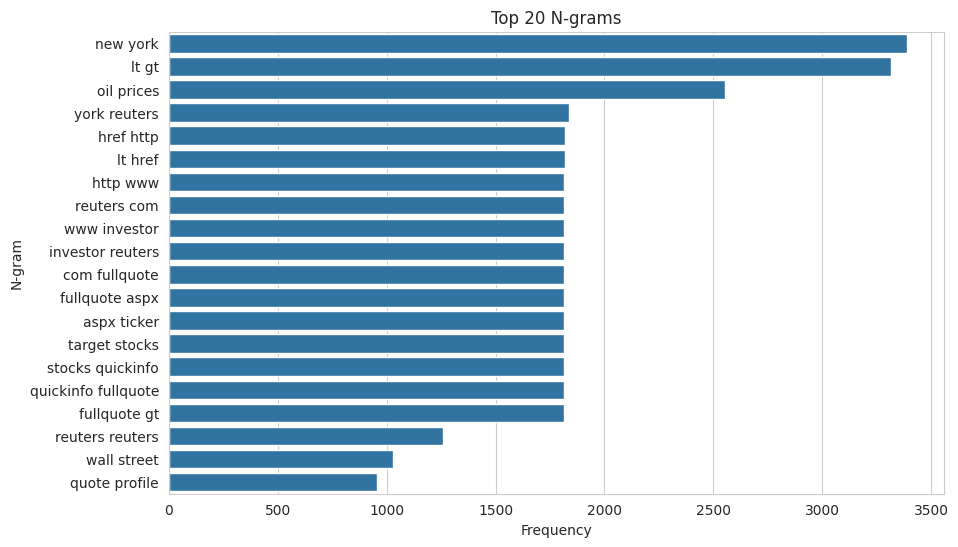

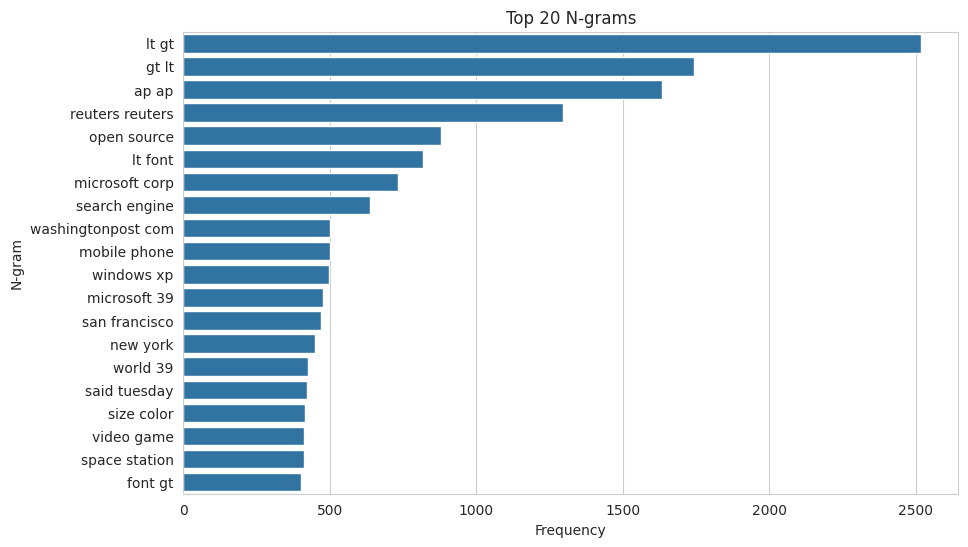

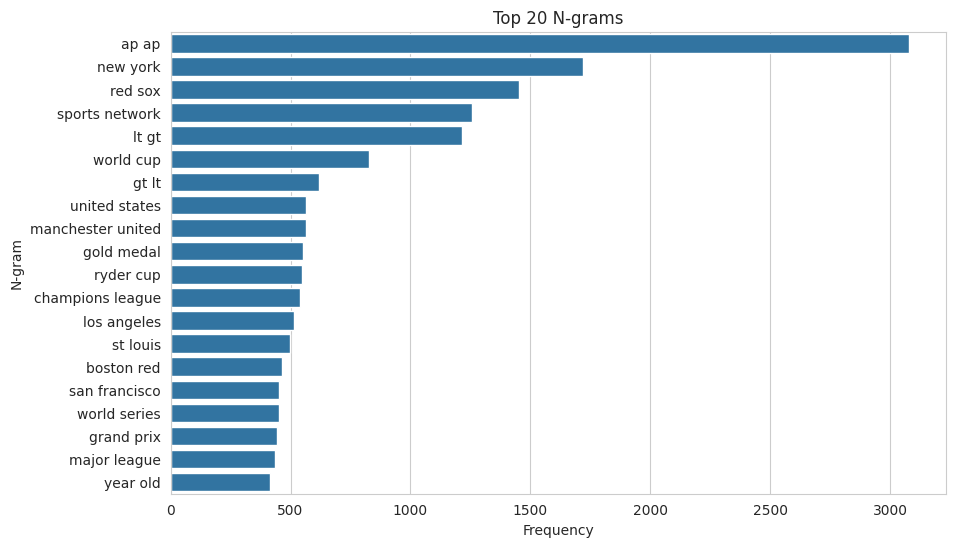

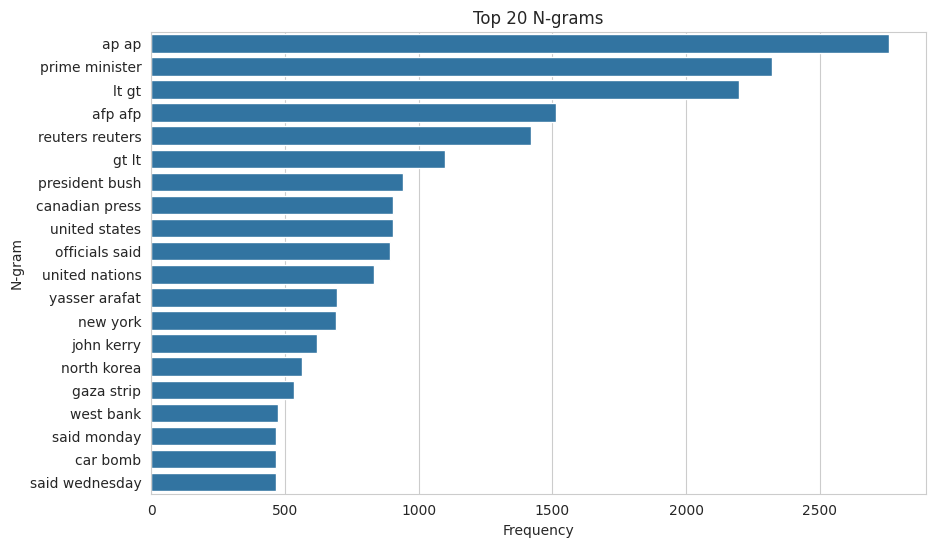

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def plot_top_ngrams(corpus, ngram_range=(2, 2), top_n=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngrams = vectorizer.fit_transform(corpus)
    ngrams_sum = ngrams.sum(axis=0)
    ngrams_freq = [(ngram, ngrams_sum[0, idx]) for ngram, idx in vectorizer.vocabulary_.items()]
    ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:top_n]

    ngrams_df = pd.DataFrame(ngrams_freq, columns=['N-gram', 'Frequency'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='N-gram', data=ngrams_df)
    plt.title(f'Top {top_n} N-grams')
    plt.show()
# Example for bi-grams
for class_index in df['Class Index'].unique():
    texts = df[df['Class Index'] == class_index]['Text']
    plot_top_ngrams(texts, ngram_range=(2, 2), top_n=20)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def preprocessing(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    stopwords_list = set(stopwords.words('english'))
    clean_words = [word for word in words if word not in stopwords_list and len(word) > 1]
    # Join clean words into a single string
    clean_text = ' '.join(clean_words)
    return clean_text
df['preprocessed_text'] = df['Text'].apply(preprocessing)

In [ ]:
df.loc[2,'Text']

"Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\\about the economy and the outlook for earnings are expected to\\hang over the stock market next week during the depth of the\\summer doldrums."

In [ ]:
df.loc[2,'preprocessed_text']

'oil economy cloud stocks outlook reuters reuters soaring crude prices plus worriesabout economy outlook earnings expected tohang stock market next week depth thesummer doldrums'

In [ ]:
df['news_labels']=df['Class Index'].apply(lambda x:x-1)
df['news_labels'].value_counts()

news_labels
2    30000
3    30000
1    30000
0    30000
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['news_labels'], test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
y_train_adjusted=tf.keras.utils.to_categorical(np.asarray(y_train),num_classes=4)
y_test_adjusted=tf.keras.utils.to_categorical(np.asarray(y_test),num_classes=4)

In [ ]:
import tensorflow as tf
import tensorflow.keras.preprocessing.text
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
vocab_length = len(word_index) + 1

In [ ]:
# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
df['word_counts'] = df['preprocessed_text'].apply(lambda x: len(str(x).split()))
max_length = int(np.percentile(df['word_counts'], 97))
print(f"Selected max length for padding: {max_length}")

Selected max length for padding: 38


In [ ]:
# Pad the sequences
max_length = 40
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

In [ ]:
# Load GloVe word embeddings and create an Embeddings Dictionary
from numpy import asarray
from numpy import zeros
embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/a2_glove.6B.100d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

# Create Embedding Matrix having 100 columns
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.
embedding_matrix = zeros((vocab_length, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# Print Embedding Matrix shape
embedding_matrix.shape

(91394, 100)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
num_classes = 4  # Update this based on the actual number of classes
model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=100, weights=[embedding_matrix], input_length=max_length, trainable=False),
    LSTM(256),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 100)           9139400   
                                                                 
 lstm (LSTM)                 (None, 256)               365568    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 4)                 1028      
                                                                 
Total params: 9505996 (36.26 MB)
Trainable params: 366596 (1.40 MB)
Non-trainable params: 9139400 (34.86 MB)
_________________________________________________________________


In [ ]:
history = model.fit(X_train_padded, y_train_adjusted, epochs=5, validation_data=(X_test_padded, y_test_adjusted), batch_size=32)

Epoch 1/5
3000/3000 [==============================] - 390s 129ms/step - loss: 0.3825 - accuracy: 0.8719 - val_loss: 0.3155 - val_accuracy: 0.8920
Epoch 2/5
3000/3000 [==============================] - 377s 126ms/step - loss: 0.3005 - accuracy: 0.8985 - val_loss: 0.2785 - val_accuracy: 0.9082
Epoch 3/5
3000/3000 [==============================] - 380s 127ms/step - loss: 0.2614 - accuracy: 0.9100 - val_loss: 0.2622 - val_accuracy: 0.9133
Epoch 4/5
3000/3000 [==============================] - 392s 131ms/step - loss: 0.2343 - accuracy: 0.9194 - val_loss: 0.2473 - val_accuracy: 0.9139
Epoch 5/5
3000/3000 [==============================] - 391s 130ms/step - loss: 0.2108 - accuracy: 0.9257 - val_loss: 0.2444 - val_accuracy: 0.9170


In [ ]:
test_loss, test_acc = model.evaluate(X_test_padded, y_test_adjusted)
print(f'Test Accuracy: {test_acc}')

750/750 [==============================] - 32s 43ms/step - loss: 0.2444 - accuracy: 0.9170
Test Accuracy: 0.9170416593551636


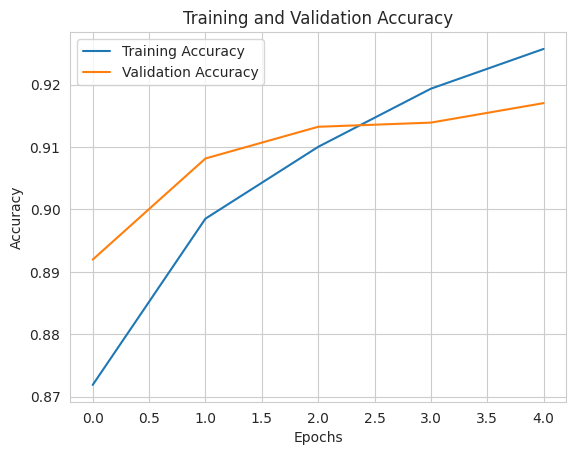

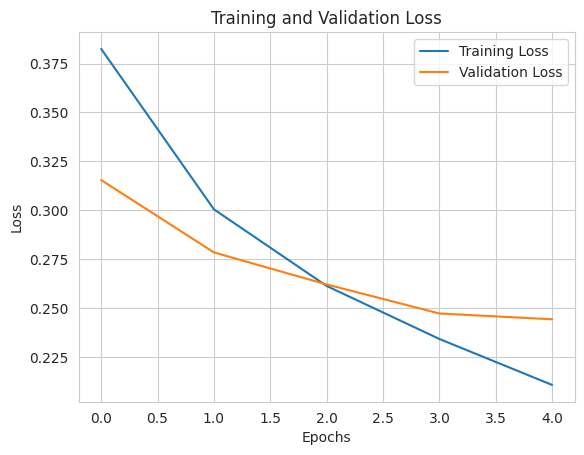

In [ ]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric], label=f'Training {metric.capitalize()}')
    plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric.capitalize()}')
    plt.xlabel("Epochs")
    plt.ylabel(metric.capitalize())
    plt.title(f'Training and Validation {metric.capitalize()}')
    plt.legend()
    plt.show()

# Plot accuracy
plot_graphs(history, 'accuracy')

# Plot loss
plot_graphs(history, 'loss')


In [ ]:
input_text = "Virat Kohli, the run machine, chased the largest target in cricket history.."

# Preprocess the input text
input_sequence = tokenizer.texts_to_sequences([input_text])
input_padded = pad_sequences(input_sequence, maxlen=max_length, padding='post', truncating='post')

# Make a prediction
predicted_probabilities = model.predict(input_padded)

print("Predicted probabilities:", predicted_probabilities)

# Convert predicted probabilities to a class index
predicted_class_index = np.argmax(predicted_probabilities, axis=1)[0]
class_labels = {0: 'World News', 1: 'Sports News', 2: 'Business News', 3: 'Tech News'}
predicted_class_name = class_labels[predicted_class_index]

print("Predicted class index:", predicted_class_index)
print("Predicted class name:", predicted_class_name)

1/1 [==============================] - 1s 523ms/step
Predicted probabilities: [[0.5230925  0.3799682  0.03013451 0.06680471]]
Predicted class index: 0
Predicted class name: World News
